<a href="https://colab.research.google.com/github/Ankuraxz/google-collab/blob/master/ALEXNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import *

Using TensorFlow backend.


In [0]:
#Hidden Conv. layers
model = Sequential()
# Conv2D(96,(55,55) , strides= 4, activation='relu', input_shape=(227,227,3))
model.add(Conv2D(96,(11,11), strides= 4, activation='relu', input_shape=(227,227,3))) #
model.add(MaxPooling2D(pool_size=(11,11), strides= 2))
# MaxPooling2D(pool_size=(27,27),kernel_size=(11,11), strides= 2, activation='relu')
model.add(Conv2D(256,(3,3), strides= 1, activation='relu'))           #5*5
model.add(MaxPooling2D(pool_size=(3,3), strides= 2))

model.add(Conv2D(384,(3,3), strides= 1, activation='relu'))
model.add(Conv2D(384,(3,3), strides= 1, activation='relu'))
model.add(Conv2D(256,(3,3), strides= 1, activation='relu'))

model.add(MaxPooling2D(pool_size=(3,3), strides= 2))

model.add(Flatten())
# outuput
model.add(Dense(9216,activation='relu'))#Fully connected layer and output layer
model.add(Dense(4096,activation='relu'))
model.add(Dense(4096,activation='relu'))
model.add(Dense(1000,activation='softmax'))

#compiling
model.compile(loss= 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

W0724 07:13:18.243348 139827784566656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0724 07:13:18.289360 139827784566656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0724 07:13:18.296704 139827784566656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0724 07:13:18.329871 139827784566656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0724 07:13:18.464624 139827784566656 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 256)       221440    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 384)         885120    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 384)         1327488   
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 256)         884992    
__________

In [0]:
# # 1st Convolutional Layer
# model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding=’valid’))
# model.add(Activation(‘relu’))
# # # Max Pooling
# # model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding=’valid’))

# # # 2nd Convolutional Layer
# # model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding=’valid’))
# # model.add(Activation(‘relu’))
# # # Max Pooling
# # model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding=’valid’))

# # # 3rd Convolutional Layer
# # model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding=’valid’))
# # model.add(Activation(‘relu’))

# # 4th Convolutional Layer
# model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding=’valid’))
# model.add(Activation(‘relu’))

# # 5th Convolutional Layer
# model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding=’valid’))
# model.add(Activation(‘relu’))
# # Max Pooling
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding=’valid’))

# # Passing it to a Fully Connected layer
# model.add(Flatten())
# # 1st Fully Connected Layer
# model.add(Dense(4096, input_shape=(224*224*3,)))
# model.add(Activation(‘relu’))
# # Add Dropout to prevent overfitting
# model.add(Dropout(0.4))

# # 2nd Fully Connected Layer
# model.add(Dense(4096))
# model.add(Activation(‘relu’))
# # Add Dropout
# model.add(Dropout(0.4))

# # 3rd Fully Connected Layer
# model.add(Dense(1000))
# model.add(Activation(‘relu’))
# # Add Dropout
# model.add(Dropout(0.4))

# # Output Layer
# model.add(Dense(17))
# model.add(Activation(‘softmax’))

# model.summary()

# # Compile the model
# model.compile(loss=keras.losses.categorical_crossentropy, optimizer=’adam’, metrics=[“accuracy”]) 

In [0]:
from keras.datasets import cifar10

In [0]:
(X_train,Y_train),(X_test,Y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [0]:
X_train.shape

(50000, 32, 32, 3)

In [0]:
X_test.shape

(10000, 32, 32, 3)

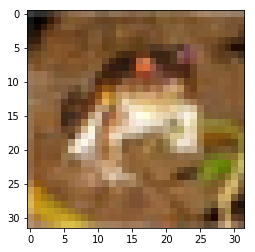

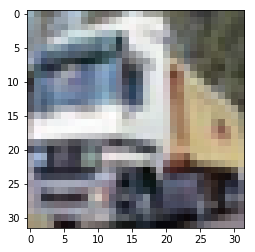

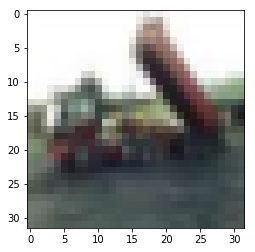

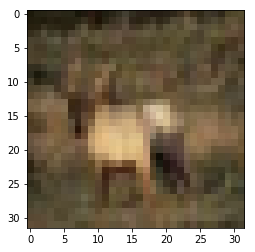

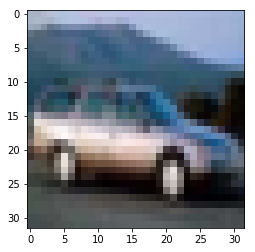

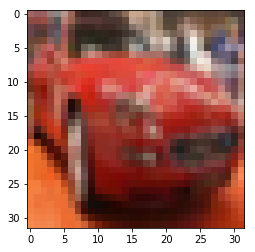

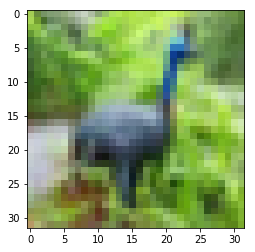

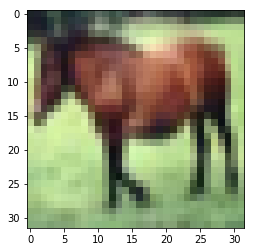

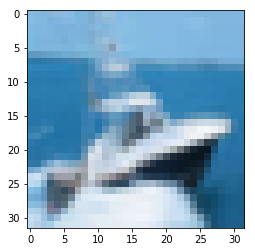

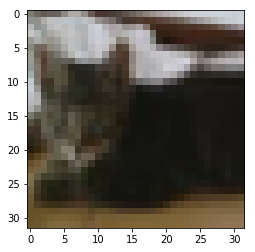

In [0]:
for ix in range(10):
    x = X_train[ix].reshape(32,32,3)
    plt.imshow(x)
    plt.show()
    

In [0]:
#normalization
X_train = X_train.astype('float32')/225
X_test = X_test.astype('float32')/225

In [0]:
Y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]])

In [0]:
from keras.utils import to_categorical
Y_test = to_categorical(Y_test)
Y_train = to_categorical(Y_train)

In [0]:
model = Sequential()
# Conv2D(96,(55,55) , strides= 4, activation='relu', input_shape=(227,227,3))
model.add(Conv2D(filters=32,kernel_size=(3,3), activation='relu', input_shape=(32,32,3))) #
model.add(MaxPooling2D())
model.add(Dropout(0.2))
# MaxPooling2D(pool_size=(27,27),kernel_size=(11,11), strides= 2, activation='relu')
model.add(Conv2D(filters=64,kernel_size=(3,3), activation='relu')) #
model.add(MaxPooling2D())
model.add(Conv2D(filters=128,kernel_size=(3,3), activation='relu')) #
model.add(MaxPooling2D())
model.add(Dropout(0.2))
# model.add(Conv2D(64,(3,3), strides= 1, activation='relu'))           #5*5
# model.add(MaxPooling2D(pool_size=(3,3), strides= 2))

# model.add(Conv2D(384,(3,3), strides= 1, activation='relu'))
# model.add(Conv2D(384,(3,3), strides= 1, activation='relu'))
# model.add(Conv2D(256,(3,3), strides= 1, activation='relu'))

# model.add(MaxPooling2D(pool_size=(3,3), strides= 2))

model.add(Flatten())
# outuput
# model.add(Dense(9216,activation='relu'))#Fully connected layer and output layer
# model.add(Dense(4096,activation='relu'))
# model.add(Dense(4096,activation='relu'))
model.add(Dense(10,activation='softmax'))

#compiling
model.compile(loss= 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 2, 2, 128)         0         
__________

In [0]:
hist = model.fit(X_train,Y_train,batch_size = 256, epochs = 30, verbose= True,validation_split= 0.2,shuffle= True )

Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 5s 115us/step - loss: 1.9172 - acc: 0.2935 - val_loss: 1.6422 - val_acc: 0.4106
Epoch 2/30
40000/40000 [==============================] - 4s 97us/step - loss: 1.5546 - acc: 0.4341 - val_loss: 1.4243 - val_acc: 0.4913
Epoch 3/30
40000/40000 [==============================] - 4s 97us/step - loss: 1.4128 - acc: 0.4899 - val_loss: 1.3247 - val_acc: 0.5301
Epoch 4/30
40000/40000 [==============================] - 4s 98us/step - loss: 1.3181 - acc: 0.5301 - val_loss: 1.2335 - val_acc: 0.5636
Epoch 5/30
40000/40000 [==============================] - 4s 99us/step - loss: 1.2516 - acc: 0.5569 - val_loss: 1.1719 - val_acc: 0.5941
Epoch 6/30
40000/40000 [==============================] - 4s 99us/step - loss: 1.1868 - acc: 0.5818 - val_loss: 1.1553 - val_acc: 0.5986
Epoch 7/30
40000/40000 [==============================] - 4s 97us/step - loss: 1.1350 - acc: 0.6014 - val_loss: 1.1265 - val_ac

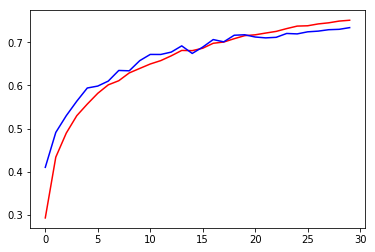

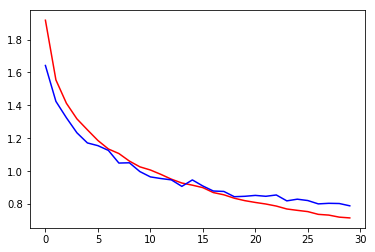

In [0]:
plt.figure()
plt.plot(hist.history['acc'],color ='r')
plt.plot(hist.history['val_acc'],color ='b')

plt.figure()
plt.plot(hist.history['loss'],color ='r')
plt.plot(hist.history['val_loss'],color ='b')

plt.show()

In [0]:
ypred=model.predict(X_test)
ypred

array([[3.6327023e-02, 2.0294732e-03, 1.9367142e-02, ..., 1.3733249e-03,
        4.9362563e-02, 3.7762150e-03],
       [4.0949743e-02, 1.0985349e-01, 9.3082899e-06, ..., 7.3385160e-09,
        8.4833783e-01, 8.4899215e-04],
       [8.2195498e-02, 5.6977116e-02, 6.1095145e-04, ..., 6.0038408e-04,
        8.2513195e-01, 3.0720674e-02],
       ...,
       [9.6765536e-05, 8.8465706e-05, 1.1527457e-02, ..., 1.9055868e-02,
        1.9740206e-04, 2.5203024e-04],
       [1.3855277e-01, 2.3787358e-01, 5.5325940e-02, ..., 2.1531362e-02,
        1.6602254e-04, 3.8456866e-03],
       [1.2335583e-05, 5.1451989e-06, 2.5840051e-04, ..., 9.7599310e-01,
        4.4869154e-07, 6.8192976e-06]], dtype=float32)